<center><h1>DSCI-552 HW_7</h1></center>
<br>
<center><font size="4">Name: Jiade Song    GitHubID: JiadeSong     USCID: 9019610285 </font></center>

<center><font size="4">1. Multi-class and Multi-Label Classification Using Support Vector Machines</font></center>

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import random
from sklearn.metrics import accuracy_score

### (a)

In [2]:
file_path = r'../../Data/Anuran_Calls_MFCCs/Frogs_MFCCs.csv'
dataset = pd.read_csv(file_path, delimiter=",")
# Original dataset file was modified slightly due to the extral spaces in some of the column labels.

In [3]:
dataset

,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,MFCCs_9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
X_data = dataset.drop(columns=['Family', 'Genus', 'Species', 'RecordID'],axis=0)
y_data = dataset[['Family', 'Genus', 'Species']]
y_data

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=24)
X_train

,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,MFCCs_9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
7141,1.0,-0.085292,0.101780,0.139571,0.084908,0.072504,0.041724,0.182466,0.145338,0.000592,...,-0.042653,-0.030166,-0.024330,0.018136,0.018866,0.024917,0.037556,0.038570,-0.010416,-0.030000
1589,1.0,0.164541,0.083420,0.531550,0.167409,0.023603,-0.176244,-0.007030,0.276204,0.114335,...,0.346958,-0.124680,-0.299070,0.028217,0.203711,0.037311,-0.134599,-0.185808,0.061299,0.269509
3504,1.0,0.668083,0.296053,0.481094,0.212226,0.019397,-0.103887,0.046335,0.199325,0.067891,...,0.271841,-0.054973,-0.165048,0.099296,0.199774,0.000264,-0.100930,-0.121024,0.058107,0.214245
4604,1.0,0.044800,0.157207,0.588344,0.235148,0.038768,-0.169406,-0.047229,0.193274,0.025277,...,0.165627,-0.356441,-0.203355,0.270782,0.208196,-0.124745,-0.210277,-0.074102,0.191372,0.196609
568,1.0,0.459180,0.587295,0.474851,-0.185232,-0.007483,0.361223,0.022262,-0.257175,0.220895,...,0.005149,0.259271,0.029616,-0.141479,0.090093,0.097835,-0.057859,-0.037824,0.075149,-0.000487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,1.0,0.147163,0.137098,0.549401,0.231500,0.091207,-0.120746,-0.048764,0.160876,0.060389,...,0.125495,-0.319333,-0.115943,0.266020,0.104313,-0.139369,-0.116357,-0.016016,0.151868,0.175410
343,1.0,0.625136,0.687237,0.583013,-0.137969,-0.079318,0.428873,0.093345,-0.290215,0.115262,...,-0.056587,0.154197,-0.013495,-0.173507,0.052333,0.127297,-0.029843,0.031279,0.061858,0.020855
6336,1.0,0.098824,0.320253,0.331377,0.199089,0.223720,0.074226,-0.138664,-0.014837,0.061864,...,0.064840,-0.028143,-0.106949,0.050345,0.130946,0.011257,-0.031166,-0.001012,-0.035284,0.012796
899,1.0,0.016435,0.164486,0.509692,0.199591,0.240967,-0.009479,-0.170251,0.240374,0.387740,...,0.008788,0.264490,0.209121,-0.096267,-0.287074,-0.001423,0.142126,-0.072530,-0.131682,-0.014587


### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

#### i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

#### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [6]:
ovr_svc1 = SVC(kernel='rbf',decision_function_shape='ovr')
test_params1 = {'C':[1,5,10,50,100,500],'gamma':[0.5,1,3,5]}
# Use all data, set the threshold to be 80%
# source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [7]:
Trained_gsearch_1_Family = GridSearchCV(estimator = ovr_svc1, param_grid = test_params1,cv=10).\
fit(X_train,y_train['Family'])

In [8]:
Trained_gsearch_1_Family.best_params_

{'C': 5, 'gamma': 3}

In [9]:
Pre_data_Family = Trained_gsearch_1_Family.predict(X_train)

In [10]:
Trained_gsearch_1_Genus = GridSearchCV(estimator = ovr_svc1, param_grid = test_params1,cv=10).\
fit(X_train,y_train['Genus'])

In [11]:
Trained_gsearch_1_Genus.best_params_

{'C': 10, 'gamma': 3}

In [12]:
Pre_data_Genus = Trained_gsearch_1_Genus.predict(X_train)

In [13]:
Trained_gsearch_1_Species = GridSearchCV(estimator = ovr_svc1, param_grid = test_params1,cv=10).\
fit(X_train,y_train['Species'])

In [14]:
Trained_gsearch_1_Species.best_params_

{'C': 10, 'gamma': 3}

In [15]:
Pre_data_Species = Trained_gsearch_1_Species.predict(X_train)

In [16]:
Pre_data = pd.DataFrame()
Pre_data['Family']=pd.Series(Pre_data_Family)
Pre_data['Genus']=pd.Series(Pre_data_Genus)
Pre_data['Species']=pd.Series(Pre_data_Species)
Pre_data

,Family,Genus,Species
0,Hylidae,Scinax,ScinaxRuber
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
5031,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5032,Leptodactylidae,Adenomera,AdenomeraAndre
5033,Hylidae,Hypsiboas,HypsiboasCordobae
5034,Dendrobatidae,Ameerega,Ameeregatrivittata


In [17]:
Exact_Match_all_data = np.all(Pre_data == y_train.reset_index()[['Family','Genus','Species']], axis=1).mean()
Hamming_Loss_all_data = (hamming_loss(y_train['Family'], Pre_data['Family'])+\
    hamming_loss(y_train['Genus'], Pre_data['Genus'])+hamming_loss(y_train['Species'], Pre_data['Species']))/3
Hamming_Score = 1-Hamming_Loss_all_data
# Source: https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html

In [18]:
Exact_Match_all_data

1.0

In [19]:
Hamming_Score

1.0

All scores are greater than 80%, the parameter ranges ({'C':[0.0001,1000],'gamma':[0.0001,1000]}) chosen is reasonable. 

The final range for iteration is {'C':[1,5,10,50,100,500],'gamma':[0.5,1,3,5]}.

For Family label: {'C': 5, 'gamma': 3}
For Genus label: {'C': 10, 'gamma': 3}
For Species label: {'C': 10, 'gamma': 3}

#### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize4 the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [20]:
ovr_svc2 = LinearSVC(penalty='l1',multi_class='ovr',dual=False)
test_params2 = {'C':[60,70,80,90,100,200,220,240,260]}

In [21]:
Trained_gsearch_2_Family = GridSearchCV(estimator = ovr_svc2, param_grid = test_params2,cv=10).\
fit(X_train,y_train['Family'])

In [22]:
Trained_gsearch_2_Family.best_params_

{'C': 60}

In [23]:
Pre_data_Family2 = Trained_gsearch_2_Family.predict(X_train)

In [24]:
Trained_gsearch_2_Genus = GridSearchCV(estimator = ovr_svc2, param_grid = test_params2,cv=10).\
fit(X_train,y_train['Genus'])

In [25]:
Trained_gsearch_2_Genus.best_params_

{'C': 240}

In [26]:
Pre_data_Genus2 = Trained_gsearch_2_Genus.predict(X_train)

In [27]:
Trained_gsearch_2_Species = GridSearchCV(estimator = ovr_svc2, param_grid = test_params2,cv=10).\
fit(X_train,y_train['Species'])

In [28]:
Trained_gsearch_2_Species.best_params_

{'C': 70}

In [29]:
Pre_data_Species2 = Trained_gsearch_2_Species.predict(X_train)

In [30]:
Pre_data2 = pd.DataFrame()
Pre_data2['Family']=pd.Series(Pre_data_Family2)
Pre_data2['Genus']=pd.Series(Pre_data_Genus2)
Pre_data2['Species']=pd.Series(Pre_data_Species2)
Pre_data2

,Family,Genus,Species
0,Hylidae,Scinax,ScinaxRuber
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
5031,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5032,Leptodactylidae,Adenomera,AdenomeraAndre
5033,Hylidae,Hypsiboas,HypsiboasCordobae
5034,Dendrobatidae,Ameerega,Ameeregatrivittata


In [31]:
Exact_Match_all_data2 = np.all(Pre_data2 == y_train.reset_index()[['Family','Genus','Species']], axis=1).mean()
Hamming_Loss_all_data2 = (hamming_loss(y_train['Family'], Pre_data2['Family'])+\
    hamming_loss(y_train['Genus'], Pre_data2['Genus'])+hamming_loss(y_train['Species'], Pre_data2['Species']))/3
Hamming_Score2 = 1-Hamming_Loss_all_data2

In [32]:
Exact_Match_all_data2

0.9166004765687054

In [33]:
Hamming_Score2

0.9504898067249139

The final range for iteration is {'C':[60,70,80,90,100,200,220,240,260]}.

For Family label: {'C': 60}
For Genus label: {'C': 240}
For Species label: {'C': 70}

#### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [34]:
Family_class = pd.DataFrame(dataset.groupby('Family')['RecordID'].count())
Family_class

,RecordID
Family,
Bufonidae,68
Dendrobatidae,542
Hylidae,2165
Leptodactylidae,4420


In [35]:
Genus_class = pd.DataFrame(dataset.groupby('Genus')['RecordID'].count())
Genus_class

,RecordID
Genus,
Adenomera,4150
Ameerega,542
Dendropsophus,310
Hypsiboas,1593
Leptodactylus,270
Osteocephalus,114
Rhinella,68
Scinax,148


In [36]:
Species_class = pd.DataFrame(dataset.groupby('Species')['RecordID'].count())
Species_class

,RecordID
Species,
AdenomeraAndre,672
AdenomeraHylaedactylus,3478
Ameeregatrivittata,542
HylaMinuta,310
HypsiboasCinerascens,472
HypsiboasCordobae,1121
LeptodactylusFuscus,270
OsteocephalusOophagus,114
Rhinellagranulosa,68


In [37]:
smote = SMOTE(random_state=24)
X_sm_train_f, y_sm_train_f = smote.fit_resample(X_train, y_train['Family'])
smote = SMOTE(random_state=24)
X_sm_train_g, y_sm_train_g = smote.fit_resample(X_train, y_train['Genus'])
smote = SMOTE(random_state=24)
X_sm_train_s, y_sm_train_s = smote.fit_resample(X_train, y_train['Species'])

In [38]:
print(Counter(y_sm_train_f))
print(Counter(y_sm_train_g))
print(Counter(y_sm_train_s))

Counter({'Hylidae': 3054, 'Leptodactylidae': 3054, 'Dendrobatidae': 3054, 'Bufonidae': 3054})
Counter({'Scinax': 2861, 'Adenomera': 2861, 'Hypsiboas': 2861, 'Leptodactylus': 2861, 'Dendropsophus': 2861, 'Osteocephalus': 2861, 'Ameerega': 2861, 'Rhinella': 2861})
Counter({'ScinaxRuber': 2394, 'AdenomeraHylaedactylus': 2394, 'AdenomeraAndre': 2394, 'HypsiboasCordobae': 2394, 'LeptodactylusFuscus': 2394, 'HylaMinuta': 2394, 'HypsiboasCinerascens': 2394, 'OsteocephalusOophagus': 2394, 'Ameeregatrivittata': 2394, 'Rhinellagranulosa': 2394})


In [39]:
ovr_svc3 = LinearSVC(penalty='l1',multi_class='ovr',dual=False)
test_params3 = {'C':[50,60,70,80,90,100,200,220,240,260]}

In [40]:
Trained_gsearch_3_Family = GridSearchCV(estimator = ovr_svc3, param_grid = test_params3,cv=3).\
fit(X_sm_train_f,y_sm_train_f)

In [41]:
Trained_gsearch_3_Family.best_params_

{'C': 220}

In [42]:
Pre_data_Family3 = Trained_gsearch_3_Family.predict(X_train)

In [43]:
Trained_gsearch_3_Genus = GridSearchCV(estimator = ovr_svc3, param_grid = test_params3,cv=3).\
fit(X_sm_train_g,y_sm_train_g)

In [44]:
Trained_gsearch_3_Genus.best_params_

{'C': 60}

In [45]:
Pre_data_Genus3 = Trained_gsearch_3_Genus.predict(X_train)

In [46]:
Trained_gsearch_3_Species = GridSearchCV(estimator = ovr_svc3, param_grid = test_params3,cv=3).\
fit(X_sm_train_s,y_sm_train_s)

In [47]:
Trained_gsearch_3_Species.best_params_

{'C': 60}

In [48]:
Pre_data_Species3 = Trained_gsearch_3_Species.predict(X_train)

In [49]:
Pre_data3 = pd.DataFrame()
Pre_data3['Family']=pd.Series(Pre_data_Family3)
Pre_data3['Genus']=pd.Series(Pre_data_Genus3)
Pre_data3['Species']=pd.Series(Pre_data_Species3)
Pre_data3

,Family,Genus,Species
0,Hylidae,Scinax,ScinaxRuber
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
5031,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5032,Leptodactylidae,Dendropsophus,AdenomeraAndre
5033,Hylidae,Hypsiboas,HypsiboasCordobae
5034,Dendrobatidae,Ameerega,Ameeregatrivittata


In [50]:
Exact_Match_all_data3 = np.all(Pre_data3 == y_train.reset_index()[['Family','Genus','Species']], axis=1).mean()
Hamming_Loss_all_data3 = (hamming_loss(y_train['Family'], Pre_data3['Family'])+\
    hamming_loss(y_train['Genus'], Pre_data3['Genus'])+hamming_loss(y_train['Species'], Pre_data3['Species']))/3
Hamming_Score3 = 1-Hamming_Loss_all_data3

In [51]:
Exact_Match_all_data3

0.8739078633836378

In [52]:
Hamming_Score3

0.9365898861530315

For Family label: {'C': 220}
For Genus label: {'C': 60}
For Species label: {'C': 60}

<center><font size="4">2. K-Means Clustering on a Multi-Class and Multi-Label Data Set</font></center>

### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

#### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

#### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

#### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [53]:
Ran_num = [random.randrange(1, 500000000, 1) for i in range(50)]
len(Ran_num)

50

In [54]:
ch_df_array = []
sil_df_array = []
for i in Ran_num:
    ch_score_array = []
    silhouette_score_array = []
    for n in range(2,51):
        kmeans = KMeans(n_clusters=n, random_state=i)
        Pre_km = kmeans.fit_predict(X_data)
        ch_score = calinski_harabasz_score(X_data, Pre_km)
        sil_score = silhouette_score(X_data, kmeans.labels_)
        ch_score_array.append(ch_score)
        silhouette_score_array.append(sil_score)
    ch_df_array.append(ch_score_array)
    sil_df_array.append(silhouette_score_array)
#Source:https://python-bloggers.com/2022/03/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/
#Source:https://realpython.com/k-means-clustering-python/

In [55]:
ch_df = pd.DataFrame(ch_df_array)
sil_df = pd.DataFrame(sil_df_array)
ch_df_avg = ch_df.mean(axis=0)
sil_df_avg = sil_df.mean(axis=0)

In [56]:
print('The number of classes in Family is: '+str(len(Family_class)))
print('The number of classes in Genus is: '+str(len(Genus_class)))
print('The number of classes in Species is: '+str(len(Species_class)))

The number of classes in Family is: 4
The number of classes in Genus is: 8
The number of classes in Species is: 10


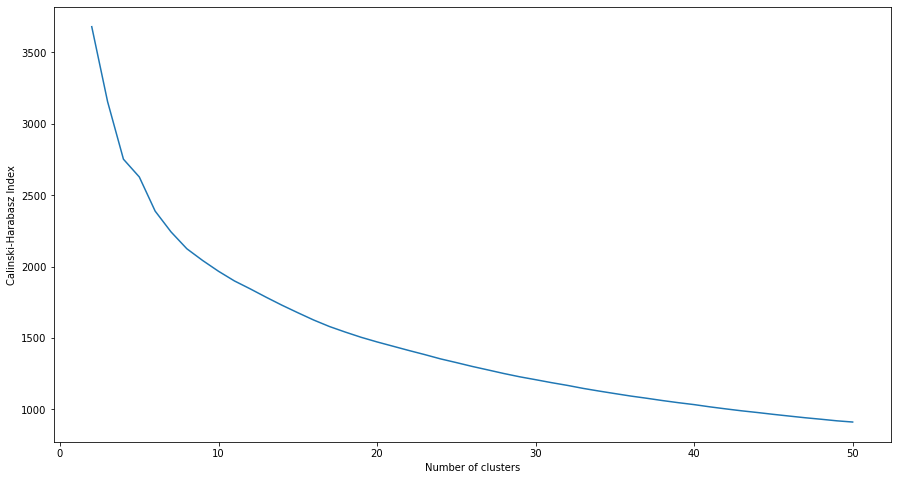

In [57]:
plt.figure(figsize = (15,8))
plt.plot(range(2,51), ch_df_avg)
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()
#Source:https://python-bloggers.com/2022/03/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/
#Source:https://realpython.com/k-means-clustering-python/

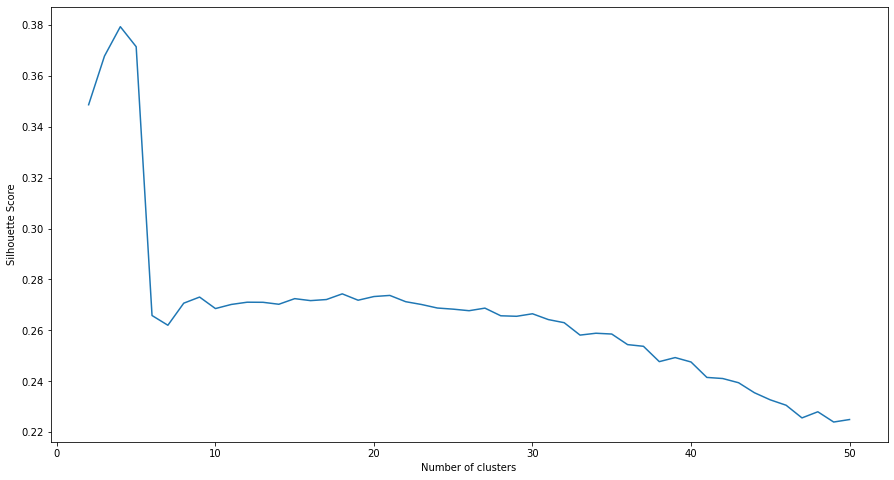

In [58]:
plt.figure(figsize = (15,8))
plt.plot(range(2,51), sil_df_avg)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()
#Source:https://python-bloggers.com/2022/03/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/
#Source:https://realpython.com/k-means-clustering-python/

For Silhouette score, the max is at 4 and after 9 the curve is decreasing
For CH Score, it is a decreasing curve.

I will choose 4,8,10 for difference classifiers. 

In [198]:

total_hamming_array = []

for i in Ran_num:

    # For Family label, Cluster number is 4
    kmeans = KMeans(n_clusters=4, random_state=i)
    Pre_km = kmeans.fit_predict(X_data)
    Pre_label = np.array(kmeans.labels_)
    true_pred = pd.DataFrame(y_data['Family'])
    true_pred['Pred'] = Pre_label
    count_table = pd.DataFrame({'count' : true_pred.groupby(['Pred','Family']).size()}).reset_index()
    label_array = []
    Pre_array = []
    for i in pd.unique(count_table['Pred']):
        Pre_array.append(i)
        label_array.append(count_table[count_table['count'] == max(count_table[count_table['Pred']==i]\
                                                                   ['count'])]['Family'].values[0])
    true_pred['Assigned'] = np.nan
    for j in range(0,len(Pre_array)):

        true_pred.loc[true_pred['Pred'] == Pre_array[j], 'Assigned'] = label_array[j]
        
    Hamming_loss_Family = hamming_loss(true_pred['Family'], true_pred['Assigned'])
    
    # For Genus label, Cluster number is 8
    kmeans = KMeans(n_clusters=8, random_state=i)
    Pre_km = kmeans.fit_predict(X_data)
    Pre_label = np.array(kmeans.labels_)
    true_pred = pd.DataFrame(y_data['Genus'])
    true_pred['Pred'] = Pre_label
    count_table = pd.DataFrame({'count' : true_pred.groupby(['Pred','Genus']).size()}).reset_index()
    label_array = []
    Pre_array = []
    for i in pd.unique(count_table['Pred']):
        Pre_array.append(i)
        label_array.append(count_table[count_table['count'] == max(count_table[count_table['Pred']==i]\
                                                                   ['count'])]['Genus'].values[0])
    true_pred['Assigned'] = np.nan
    for j in range(0,len(Pre_array)):

        true_pred.loc[true_pred['Pred'] == Pre_array[j], 'Assigned'] = label_array[j]
        
    Hamming_loss_Genus = hamming_loss(true_pred['Genus'], true_pred['Assigned'])
    
    
    # For Species label, Cluster number is 10
    kmeans = KMeans(n_clusters=10, random_state=i)
    Pre_km = kmeans.fit_predict(X_data)
    Pre_label = np.array(kmeans.labels_)
    true_pred = pd.DataFrame(y_data['Species'])
    true_pred['Pred'] = Pre_label
    count_table = pd.DataFrame({'count' : true_pred.groupby(['Pred','Species']).size()}).reset_index()
    label_array = []
    Pre_array = []
    for i in pd.unique(count_table['Pred']):
        
        Pre_array.append(i)
        label_array.append(count_table[count_table['count'] == max(count_table[count_table['Pred']==i]\
                                                                   ['count'])]['Species'].values[0])
    true_pred['Assigned'] = np.nan
    for j in range(0,len(Pre_array)):
        
        true_pred.loc[true_pred['Pred'] == Pre_array[j], 'Assigned'] = label_array[j]
        
    Hamming_loss_Species = hamming_loss(true_pred['Species'], true_pred['Assigned'])
    total_hamming = (Hamming_loss_Family+Hamming_loss_Family+Hamming_loss_Family)/3
    total_hamming_array.append(total_hamming)

In [209]:
print('Average hamming distance is: '+str(np.mean(total_hamming_array)*3))
print('Average hamming distance is: '+str(np.std(total_hamming_array)*3))

Average hamming distance is: 0.5722890896455872
Average hamming distance is: 0.02524059000049645


In [213]:
print('Average hamming distance is: '+str(np.mean(total_hamming_array)*3))
print('Average hamming loss is: '+str(np.mean(total_hamming_array)))
print('Average hamming score is: '+str(1-np.mean(total_hamming_array)))

Average hamming distance is: 0.5722890896455872
Average hamming loss is: 0.1907630298818624
Average hamming score is: 0.8092369701181377


<center><font size="4">3. ISLR 12.6.2</font></center>

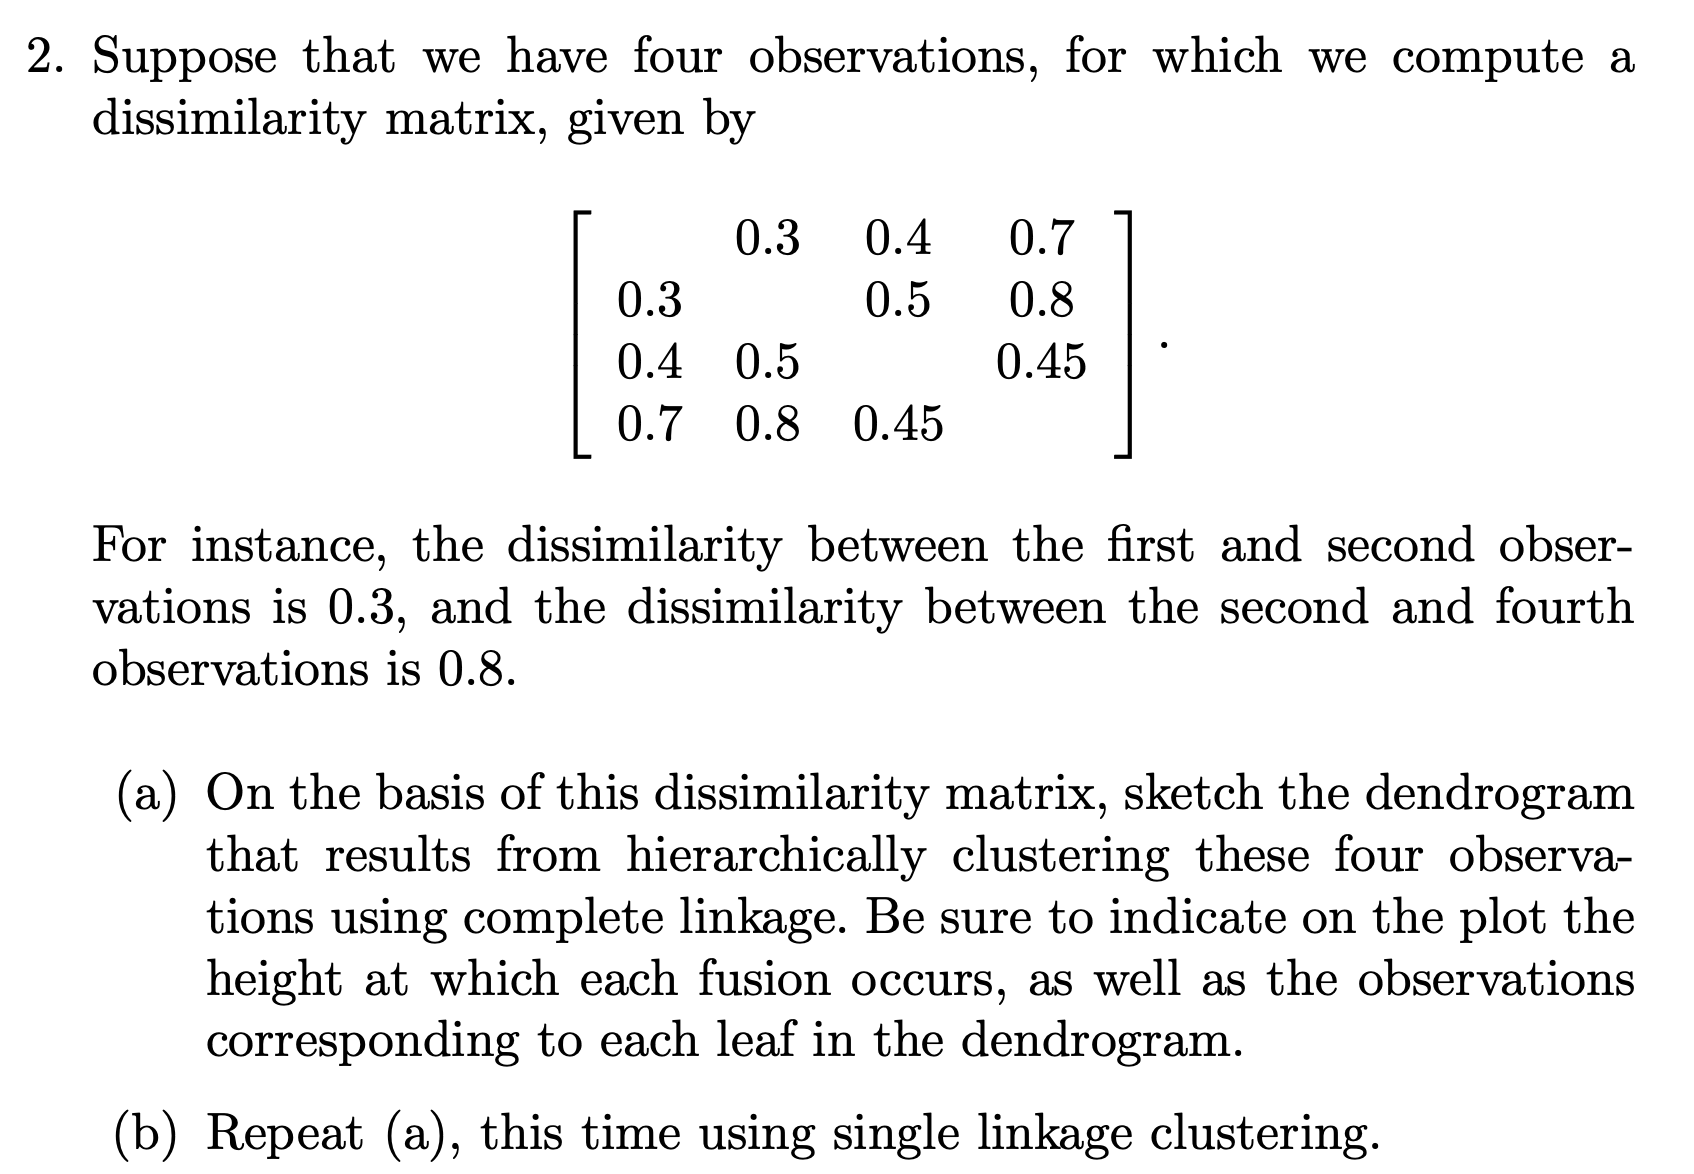

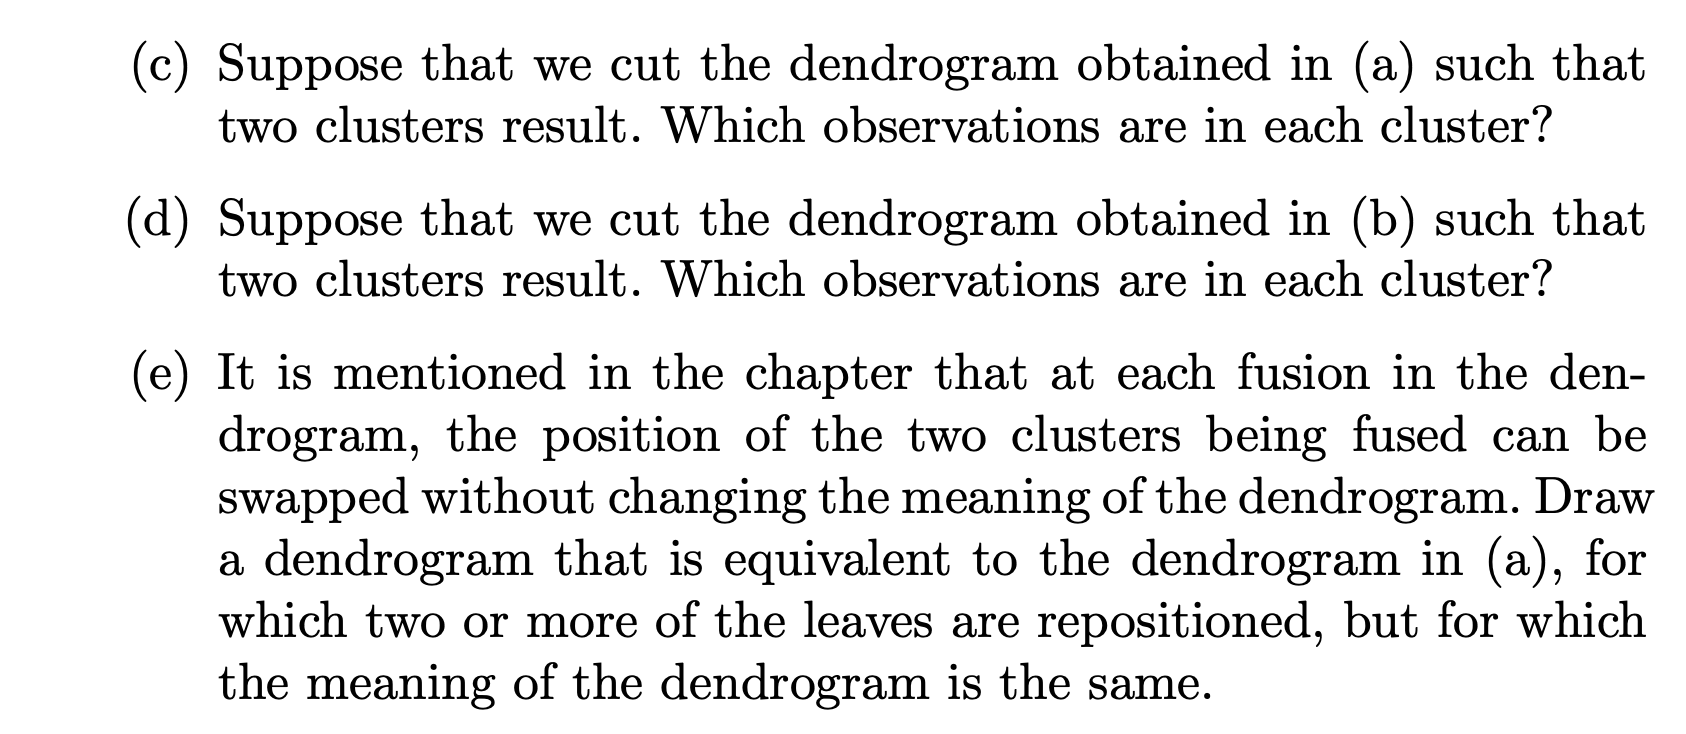

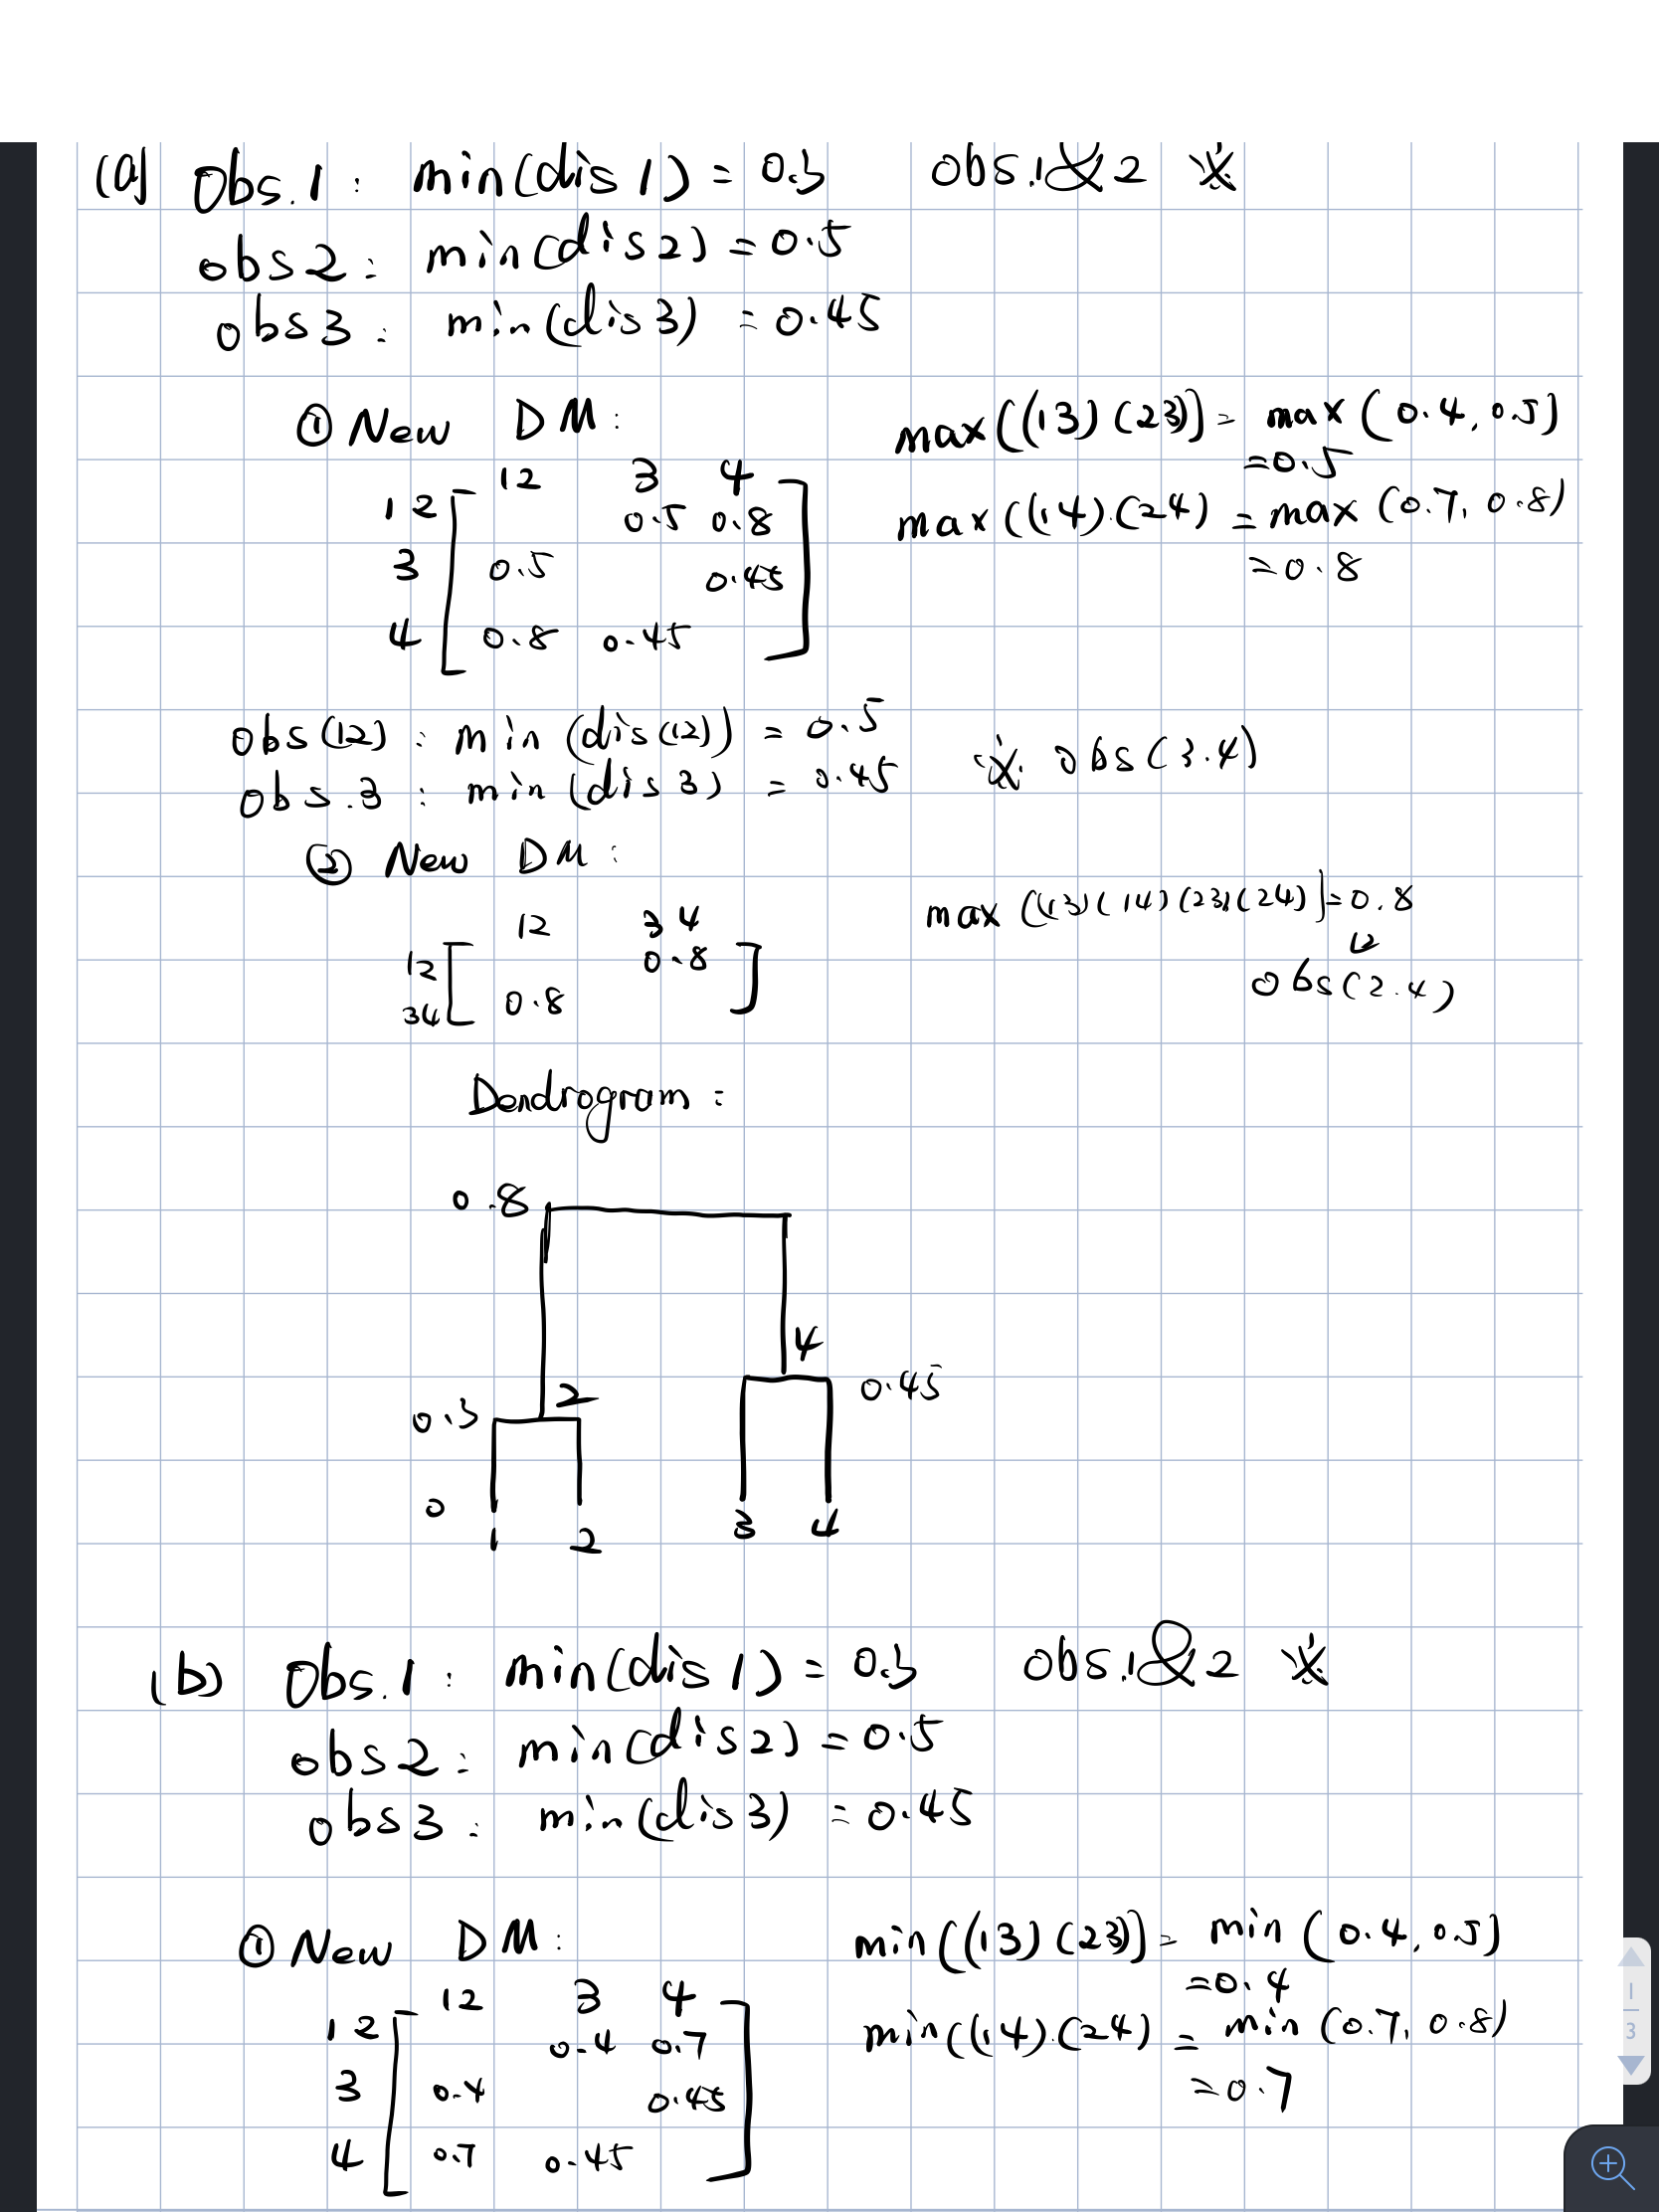

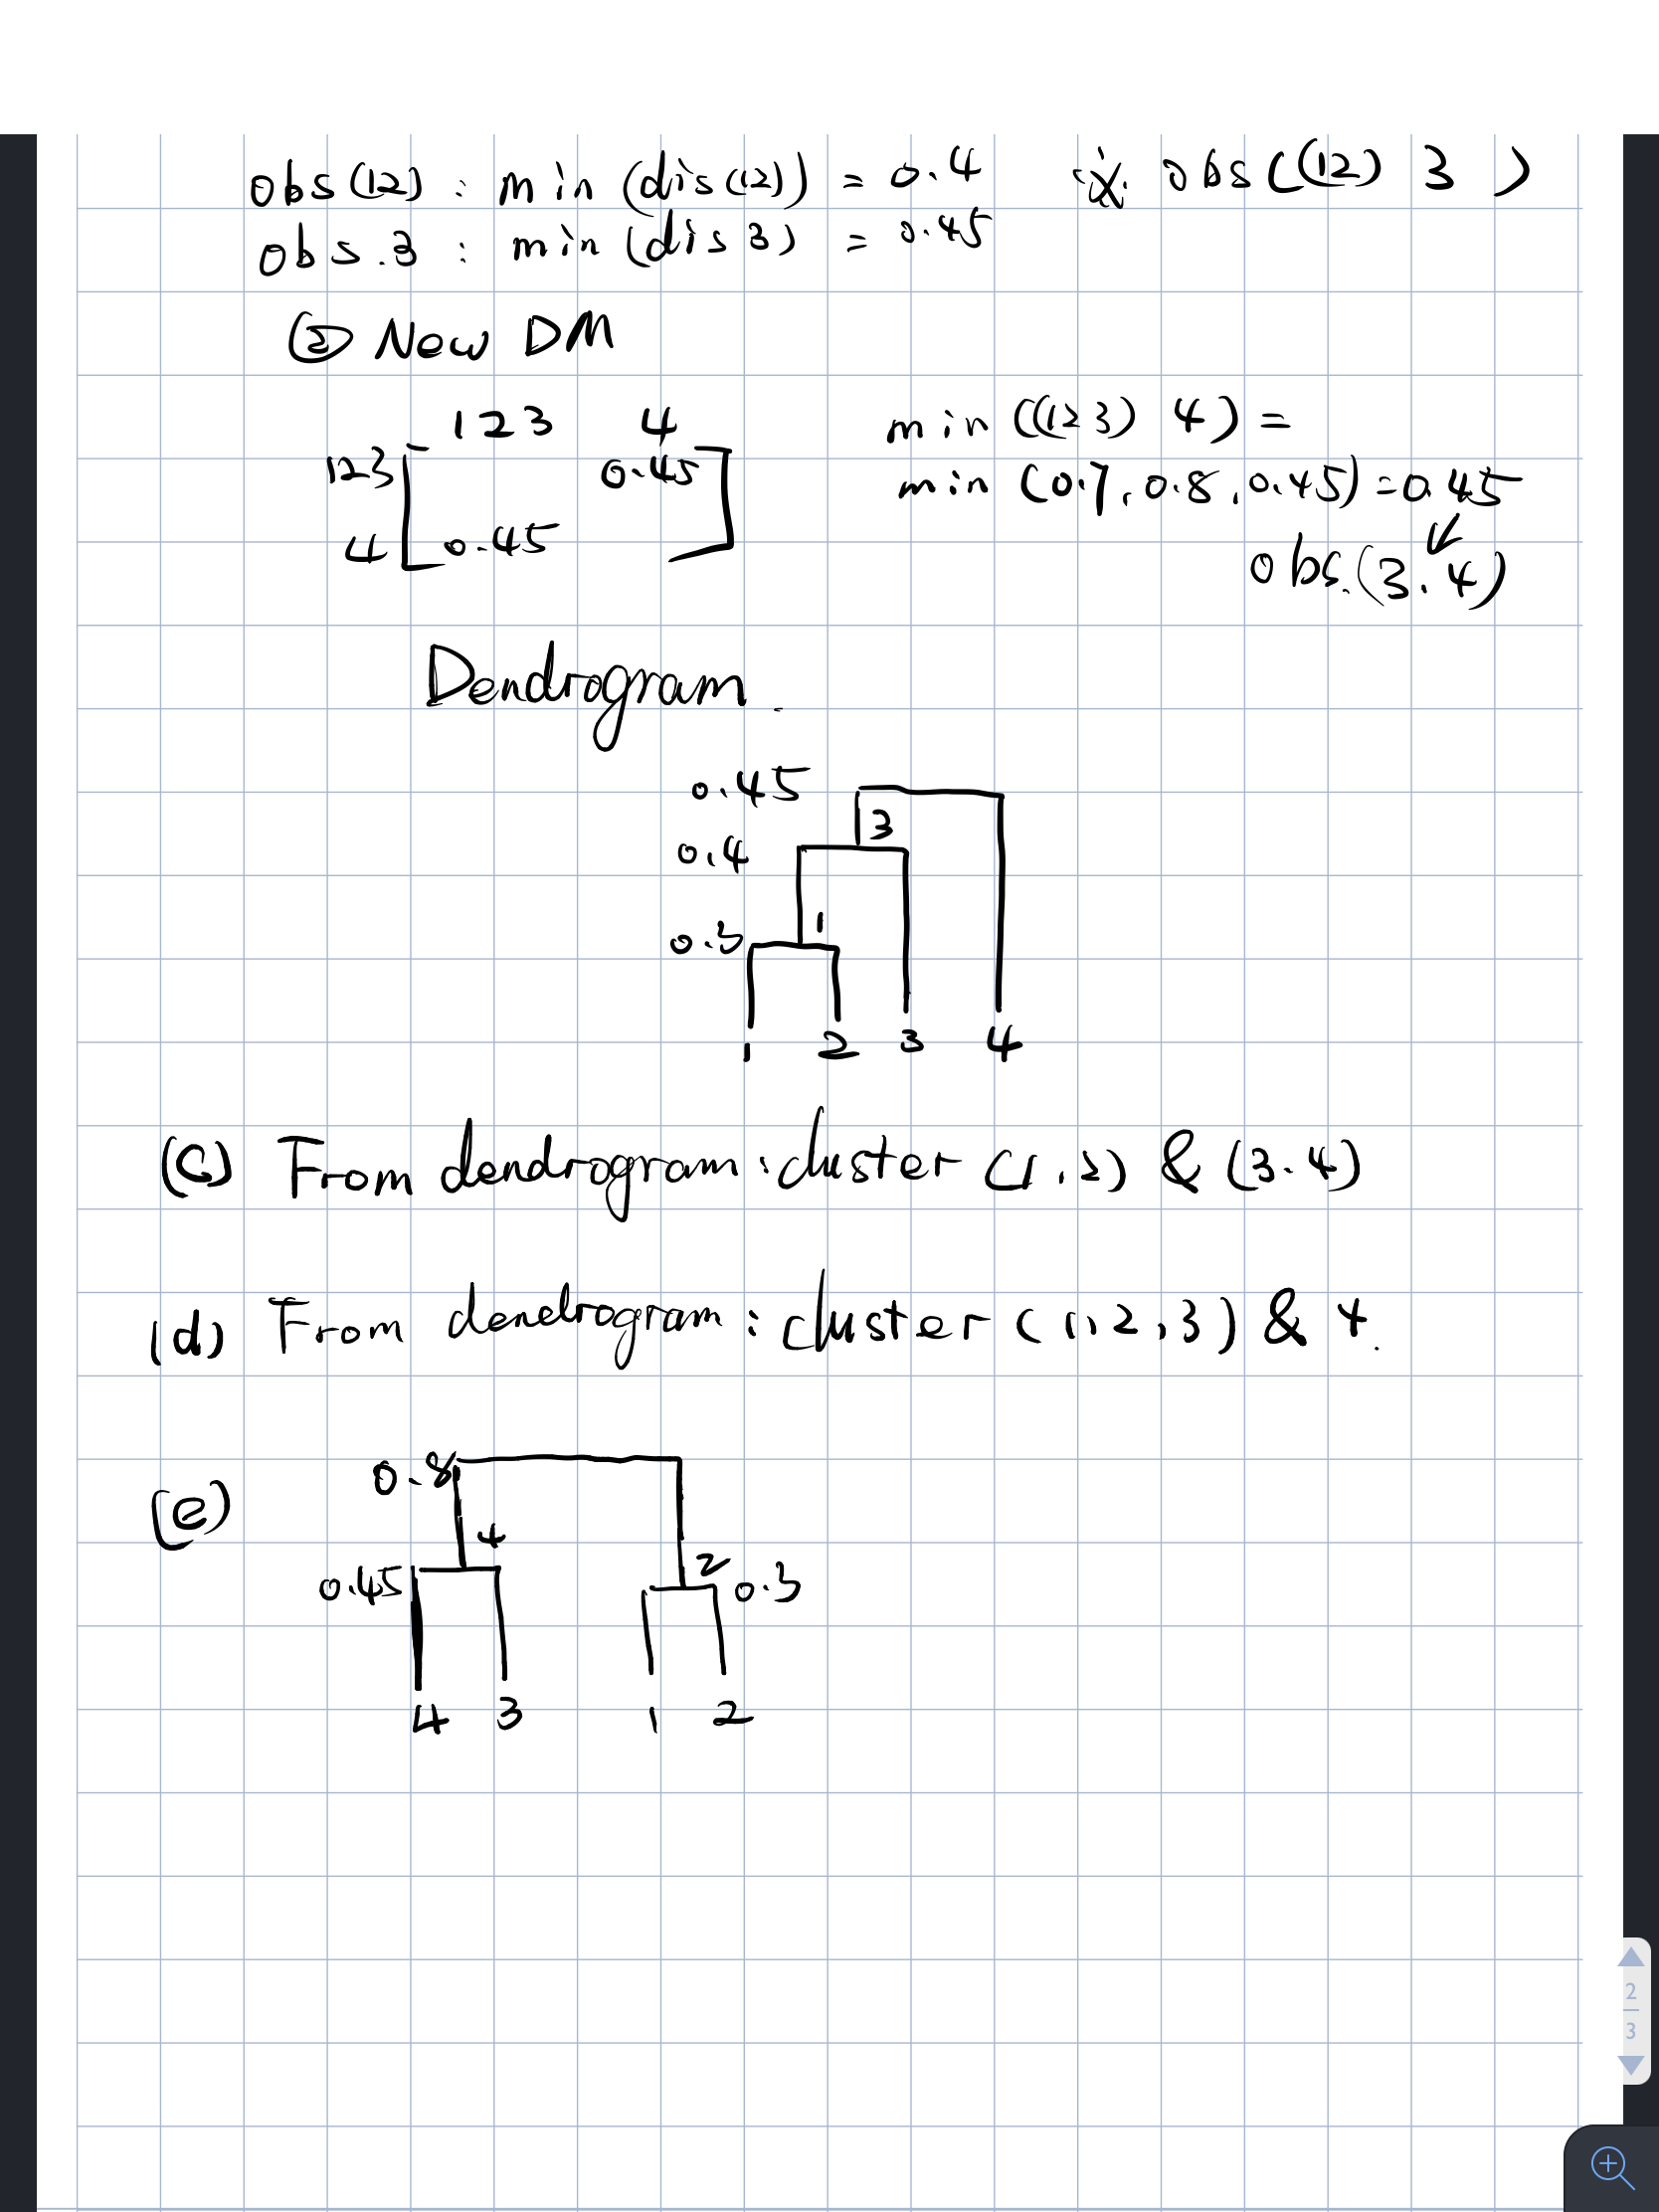